<a href="https://colab.research.google.com/github/quinn-dougherty/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/unit2_sprint2_CHALLENGE_ds1_quinndougherty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
X = df.drop('price', axis=1)
y = df.price

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [0]:
def LR(X, y, testsize=0.3): 
  #print(X.shape, y.shape)
  '''# X is a dataframe with arbitrary features
  # y is a dataframe with one feature
  # they are each sliced from the same master df. 
  '''
  # Split into test and train dataset
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=testsize, random_state=42)

  # fit model using train datasets
  model = LinearRegression()
  model.fit(X_train, Y_train)

  # Create new predictions using x_test
  y_pred = model.predict(X_test)

  # Measure Accuracy using y_test and y_pred
  RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
  R2 = r2_score(Y_test, y_pred)
  
  coefs_format = map(float, map(lambda x: '{:.3}'.format(x), model.coef_))
  
  return {'Predictions': y_pred, 'RMSE': RMSE, 'R2': R2, 'coefficients': list((coefs_format)), 'intercept': model.intercept_}

mod1 = LR(X,y)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [24]:
rs1 = f"Intercept: {mod1['intercept']:.3}\n\nCoefficients: {mod1['coefficients']}"

print(rs1)

Intercept: -2.26e+06

Coefficients: [-33.6, -1650.0, -39.2, 259.0, -1030.0, 4550.0, 1140.0, 8490.0]


## 1.5 Use the test data to make predictions

In [25]:
mod1['Predictions']

array([19097.32580858,  5482.08466941, 25931.42968492, ...,
         342.63477955, 13051.90174964, 13971.9197201 ])

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [26]:
rs2 = f"RMSE: {mod1['RMSE']:.3}\n\nCoefficient of Determination: {mod1['R2']:.3}"

print(rs2)

RMSE: 2.03e+04

Coefficient of Variation: 0.31


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

Since 'year' is one of the features I'm regressing on, it's like an `x` in a linear equation; the coefficient corresponding to year is it's _slope_. 

What year's slope tells you is **how strongly age effects price and in what direction**. A large absolute value of this coefficient means a car's age has a _huge_ efffect on price. If the slope is positive, then we know that as years increment (taking steps closer to the current year) then the price will increase. 

## 1.8 How should we interpret the Root-Mean-Square Error?

1. low is good, high is bad. 
2. "good" means "the model is accurate"
3. _infinitessimally_ low is often a sign of overfitting, so make sure none of your other metrics look dubious. 

## 1.9 How should we interpret the $R^2$?

1. $R^2$ is callled the **coefficient of determination**, it is a _proportion of variances_, comparing predictable variance of the dependent variable to variance of the independent variable
2. since it's bound in `[0,1]`, we can interpret it as a *percentage*
3. Saying that "the model gave me `R2 = x`" is spoken "**The model can explain `x%` of the variance**"

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['ln_price'] = np.log(df.price)

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

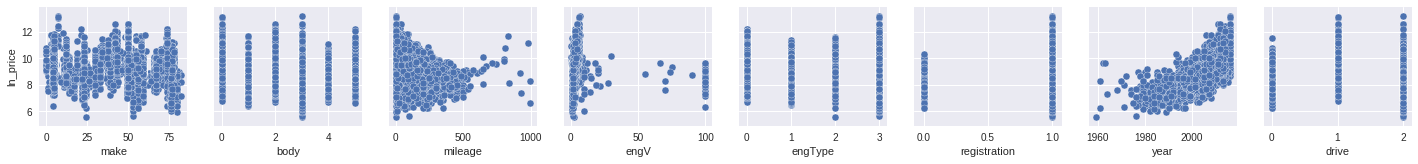

In [32]:
sns.pairplot(data=df.drop('price', axis=1), 
              x_vars=df.columns.drop(['price', 'ln_price']), 
              y_vars='ln_price');

## 2.3 If appropriate, create any polynomial features. 

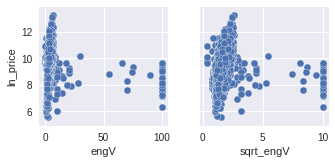

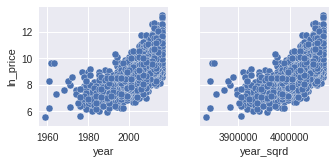

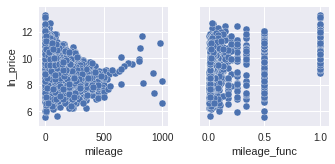

In [55]:
# I can pronounce some of the variance in engV by taking it's square root. 
df['sqrt_engV'] = np.sqrt(df.engV)

sns.pairplot(data=df, x_vars=['engV', 'sqrt_engV'], y_vars='ln_price')

## let's see if we can capture that curvature of year somehow. 
df['year_sqrd'] = df.year ** 2

sns.pairplot(data=df, x_vars=['year', 'year_sqrd'], y_vars='ln_price');

# I wonder what I can do with mileage: 
df['mileage_func'] = np.divide(1, df.mileage+1)

sns.pairplot(data=df, x_vars=['mileage', 'mileage_func'], y_vars='ln_price');


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [61]:
# we'll drop ordinals as well
# Beta . [make, sqrt_engV, year, year_sqrd, mileage, mileage_func] = yhat

mod2 = LR(df[['make', 'engV', 'sqrt_engV', 'year', 'year_sqrd', 'mileage', 'mileage_func']], df.ln_price)


rs21 = f"Intercept: {mod2['intercept']:.3}\n\nCoefficients: {mod2['coefficients']}\n\n"

rs22 = f"RMSE: {mod2['RMSE']:.3}\n\nCoefficient of Determination: {mod2['R2']:.3}\n"

print(rs21 + rs22)

Intercept: 8.12e+03

Coefficients: [-0.000691, -0.195, 2.17, -8.2, 0.00207, 0.000124, 0.279]

RMSE: 0.475

Coefficient of Determination: 0.76



## 2.5 How might we interpret the coefficient on "year" in this new regression model?

The same way as before, but it's share of overall impact on the model would be different. 

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

## 3.2 What is the "Learning Rate" and what is its function?

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?